Computing TSP solution using random technique ... done ! 
 It took 0.00 seconds - length found: 9645.30
Computing TSP solution using closest neighbor technique ... done ! 
 It took 0.00 seconds - length found: 3345.80
Computing TSP solution using Minimum Spanning Tree technique ... done ! 
 It took 0.04 seconds - length found: 5095.61


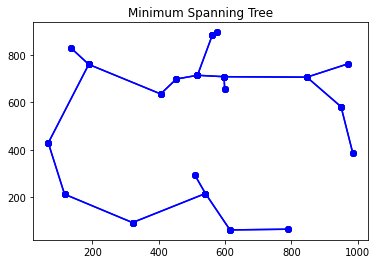

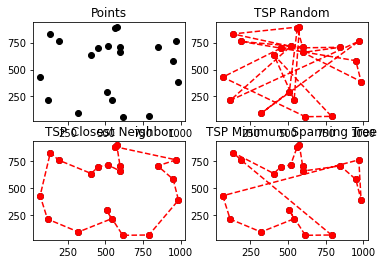

In [21]:
import matplotlib.pyplot as plt
import time
import numpy as np
import random
import heapq


# displays a MST
def plot_MST(pts,MST):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot([x[0] for x in pts], [x[1] for x in pts], "ko")
    for i in range(len(MST)): 
        for j in range(len(MST)): 
            if MST[i][j]!= np.infty: ax.plot([pts[i][0],pts[j][0]], [pts[i][1],pts[j][1]], "bo-")
    ax.title.set_text('Minimum Spanning Tree')
            
# computes the Euclidean distance between two points p1 and p2
def euclidean_distance(p1, p2):
    return np.sqrt((p2[0]-p1[0])**2 + (p2[1]-p1[1])**2)

# computes the length of a TSP solution
def compute_sol_length(graph,solution):
    length = 0
    for i in range(len(solution)-1): length = length + graph[solution[i]][solution[i+1]]
    return length

# computes with random method the TSP solution
def TSP_random(graph):
    return list(np.random.permutation(len(graph))) 
    
# computes with closest neighbor method the TSP solution
def TSP_closest_neighbor(graph): 
    n = len(graph)
    sol = []
    insol = [False]*n  # Tracks which nodes are already visited
    
    curr_idx = random.randint(0, n - 1) # start with random node
    insol[curr_idx] = True  # mark node as visited
    sol.append(curr_idx)    # append node to solution list

    while len(sol) < n:
        d_min = None
        # Find next closest unvisited node
        for idx, d in enumerate(graph[curr_idx]):
           if insol[idx] or d == 0:  # skip already visited/unreachable nodes 
               continue
           if d_min is None:
               d_min = d
               curr_idx = idx
           if d < d_min:
               d_min = d
               curr_idx = idx
        
        insol[curr_idx] = True
        sol.append(curr_idx)

    return sol

# computes the Minimum Spanning Tree
def compute_MST(graph):
    n = len(graph)
    D = [float('inf')]*n    # Tracks distance to reachable nodes from node cloud
    insol = [False]*n  # Tracks which nodes are already visited
    preds = [None]*n   # Tracks preceding node adjacent to newly added node to cloud
    graph_MST = []

    curr_idx = 0   # 0 used as starting node in DFS preorder
    D[curr_idx] = 0 # Mark starting node as reachable
    num_added = 0   # Counts size of node cloud

    while num_added < n:    
        d_min = v = None
        # Get closest unvisited node
        for i in range(n):
            if not insol[i]:
                if d_min is None: d_min = D[i]; v = i; continue
                if D[i] < d_min: d_min = D[i]; v = i

        insol[v] = True  
        num_added += 1

        # Explore edges and update distances to reachable nodes from v
        for idx, d in enumerate(graph[v]):
            if not insol[idx] and d > 0: 
                # update v as the predecessor to its adjacent nodes    
                if d < D[idx]: D[idx] = d; preds[idx] = v     

    # Build edge list from predecessor list
    for i in range(1, n):
        graph_MST.append((preds[i], i))
            
    # print(graph_MST)
    # print(preds)
    return graph_MST

# computes the preorder walk in the tree corresponding to DFS
def DFS_preorder(graph,start_node):
    # print(np.array(graph))   # graph is adjacency matrix of MST
    # Initialize dictionary that tracks discovered node in DFS
    preds = {start_node: None}  # start node has no predecessor
    def DFS(graph, start, pred_dict):
        for node, d in enumerate(graph[start]):
            if d != float('inf') and node not in pred_dict:
                pred_dict[node] = start
                DFS(graph, node, pred_dict)

    DFS(graph, start_node, preds)
    # for k, v in preds.items():
    #     print(k, v)

    sol = [*preds]  # unpack dictionary keys as list 
    sol.append(start_node)  # append starting node to complete path

    return sol
                     
# computes with Minimum Spanning Tree the TSP solution
def TSP_min_spanning_tree(graph): 
    MST = compute_MST(graph)
    
    graph_MST = [[]]*len(graph)
    for i in range(len(graph)): graph_MST[i] = [np.infty for j in range(len(graph))] 
    for i in range(len(MST)): 
        graph_MST[MST[i][0]][MST[i][1]] = graph[MST[i][0]][MST[i][1]]
        graph_MST[MST[i][1]][MST[i][0]] = graph[MST[i][1]][MST[i][0]]

    plot_MST(pts,graph_MST)        
    return DFS_preorder(graph_MST,0)

      
NUMBER_OF_POINTS = 20

# generates random points and sort them accoridng to x coordinate
pts = []
for i in range(NUMBER_OF_POINTS): pts.append([random.randint(0,1000),random.randint(0,1000)])
pts = sorted(pts, key=lambda x: x[0])

graph = [[]]*NUMBER_OF_POINTS
for i in range(NUMBER_OF_POINTS): graph[i] = [euclidean_distance(pts[i],pts[j]) for j in range(NUMBER_OF_POINTS)]

# computes the TSP solutions
print("Computing TSP solution using random technique ... ",end="")
t = time.time()
TSP_sol_random = TSP_random(graph)
print("done ! \n It took %.2f seconds - " %(time.time() - t),end="")
print("length found: %.2f" % (compute_sol_length(graph,TSP_sol_random)))

print("Computing TSP solution using closest neighbor technique ... ",end="")
t = time.time()
TSP_sol_closest_neighbor = TSP_closest_neighbor(graph)
print("done ! \n It took %.2f seconds - " %(time.time() - t),end="")
print("length found: %.2f" % (compute_sol_length(graph,TSP_sol_closest_neighbor)))

print("Computing TSP solution using Minimum Spanning Tree technique ... ",end="")
t = time.time()
TSP_sol_min_spanning_tree = TSP_min_spanning_tree(graph)
print("done ! \n It took %.2f seconds - " %(time.time() - t),end="")
print("length found: %.2f" % (compute_sol_length(graph,TSP_sol_min_spanning_tree)))


# closes the TSP solution for display if needed
if TSP_sol_random[0] != TSP_sol_random[-1]: TSP_sol_random.append(TSP_sol_random[0])
if TSP_sol_closest_neighbor[0] != TSP_sol_closest_neighbor[-1]: TSP_sol_closest_neighbor.append(TSP_sol_closest_neighbor[0])
if TSP_sol_min_spanning_tree[0] != TSP_sol_min_spanning_tree[-1]: TSP_sol_min_spanning_tree.append(TSP_sol_min_spanning_tree[0])


# displays the TSP solution
if NUMBER_OF_POINTS<100:
    fig = plt.figure()
    ax = fig.add_subplot(221)
    ax.plot([x[0] for x in pts], [x[1] for x in pts], "ko")
    ax.title.set_text('Points')  
    ax = fig.add_subplot(222)
    ax.plot([x[0] for x in pts], [x[1] for x in pts], "ko")
    ax.plot([pts[x][0] for x in TSP_sol_random], [pts[x][1] for x in TSP_sol_random], "ro--")
    ax.title.set_text('TSP Random')
    ax = fig.add_subplot(223)
    ax.plot([x[0] for x in pts], [x[1] for x in pts], "ko")
    ax.plot([pts[x][0] for x in TSP_sol_closest_neighbor], [pts[x][1] for x in TSP_sol_closest_neighbor], "ro--")
    ax.title.set_text('TSP Closest Neighbor')
    ax = fig.add_subplot(224)
    ax.plot([x[0] for x in pts], [x[1] for x in pts], "ko")
    ax.plot([pts[x][0] for x in TSP_sol_min_spanning_tree], [pts[x][1] for x in TSP_sol_min_spanning_tree], "ro--")
    ax.title.set_text('TSP Minimum Spanning Tree')
    plt.show(block=False)
    
